<a href="https://colab.research.google.com/github/PreethaBansi/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name - Zomato Restaurant Clustering and Sentiment Analysis**

##**Project Type :- Unsupervised Machine Learning**

##**Contribution :- Individual**

##**Project Summary :-**
##The Zomato Restaurant Clustering and Sentiment Analysis Project aims to categorize and analyze thousands of restaurants from across India using a Machine Learning approach. This study will enable Zomato to make data-driven decisions regarding restaurant listings, recommendations, and marketing strategies.

##There are 2 datasets in this project. The Meta Dataset provides a comprehensive list of restaurants with insights on the timings, cuisines, cost and collections followed by these restaurants. The Reviews Dataset on the other hand gives us a list of Reviewers, their Reviews and Ratings.

##The Exploratory Data Analysis(EDA) of these datasets helped visualize the data, while Unsupervised Machine Learning algorithms have been used to classify and cluster restaurants based on various criteria such as location, cuisine, price range, and rating.

##**GitHub Link :-**
https://github.com/PreethaBansi/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb



##**Problem Statement - Business Context**

##Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

##India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered.

##The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

##The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant.

##The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in. This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



##**1. Importing Libraries**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

##**2. Mounting and Loading the Dataset**

In [ ]:
meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

##**3. Understanding the Dataset**

In [ ]:
# Meta dataset shape
meta_df.shape

(105, 6)

##The Meta dataset contains:-
##Number of rows = 105
##Number of columns = 6

In [ ]:
# Reviews dataset shape
reviews_df.shape

(10000, 7)

##The Reviews dataset contains:-
##Number of rows = 10000
##Number of columns = 7

##**The Meta dataset is useful for the Clustering part of this project.**
##**The Reviews dataset is useful for the Sentiment Analysis of this project.**
##**Therefore this project first uses the Meta dataset, followed by the Reviews dataset.**

##**Meta Dataset**

In [ ]:
# Meta dataset first look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Meta dataset first look
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
# Meta dataset info
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Stating the Meta dataset columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Meta dataset descriptive summary
meta_df.describe(include = 'all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Meta dataset duplicates
meta_df[meta_df.duplicated()]

,Name,Links,Cost,Collections,Cuisines,Timings


In [ ]:
# Meta dataset duplicates count
meta_df.duplicated().sum()

0

##This shows us that there are 0 duplicated rows in this Zomata Meta dataset.

In [ ]:
# Meta dataset null values count
meta_df.isnull().sum().sort_values(ascending=False)

Collections    54
Timings         1
Name            0
Links           0
Cost            0
Cuisines        0
dtype: int64

##The dataset contains NaN values in only 2 columns out of the 6 columns in the dataset. They are
##> Collections
##> Timings

In [ ]:
# Replacing NaN values in 'Collections'
meta_df['Collections'] = meta_df['Collections'].replace(np.nan , "Unknown", regex=True)

In [ ]:
# Meta dataset null values count
meta_df.isnull().sum().sort_values(ascending=False)

Timings        1
Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
dtype: int64

In [ ]:
# Filling the NaN value boxes with 0
meta_df = meta_df.fillna(0)

In [ ]:
meta_df.isna().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [ ]:
# Converting the 'Cost' column data type into 'int64' by deleting the comma
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  105 non-null    object
 4   Cuisines     105 non-null    object
 5   Timings      105 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


##**Data Description and Attributes**
##Meta Dataset of Zomato Restaurant Clustering
##> Name : Name of Restaurants

##> Links : URL Links of Restaurants

##> Cost : Per person estimated Cost of dining

##> Collection : Tagging of Restaurants w.r.t. Zomato categories

##> Cuisines : Cuisines served by Restaurants

##> Timings : Restaurant Timings

##**4.Exploratory Data Analysis(EDA) on Meta Dataset**

##1. Top 10 Most Expensive Restaurants.

In [ ]:
# Restaurant costs as per the Meta dataset
meta_df.Cost.value_counts(ascending=False)

500     13
600     10
700      8
1200     7
400      6
1000     6
200      5
800      5
1500     5
1300     4
350      3
1600     3
750      3
550      3
900      3
1100     3
1700     2
150      2
1400     2
450      2
1900     2
300      1
2500     1
850      1
650      1
1800     1
2800     1
1750     1
250      1
Name: Cost, dtype: int64

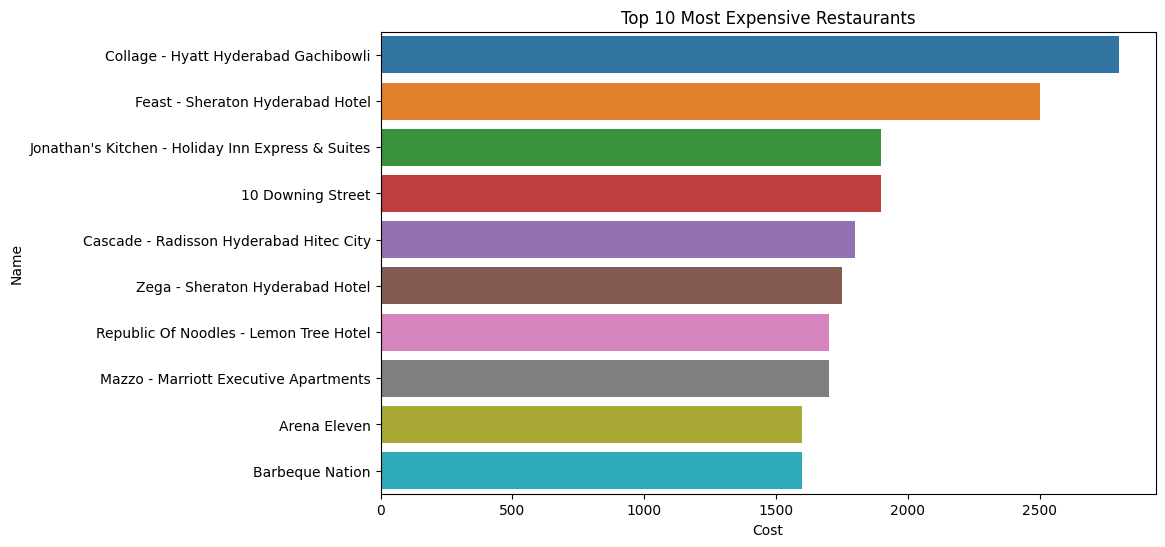

In [ ]:
# Plotting the Top 10 most expensive restaurants
plt.rcParams['figure.figsize']= (10,6)
sns.barplot(x='Cost', y='Name', data=meta_df.sort_values(ascending=False, by='Cost')[:10])
plt.title('Top 10 Most Expensive Restaurants')
plt.show()

##Inference
##The bar graph above shows the Top 10 Expensive Restaurants as per the Meta dataset with it's corresponding cost.
##The most expensive restaurant is the Collage - Hyatt Hyderabad Gachibowli costing about 2800 bucks.

##2. Top 10 Least Expensive Restaurants.

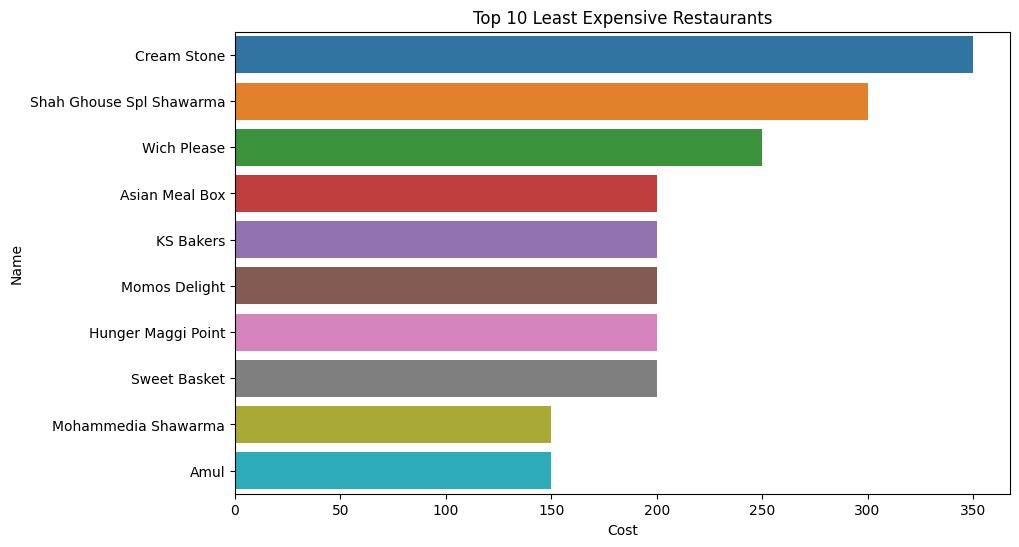

In [ ]:
# Plotting the Top 10 Least Expensive Restaurants
plt.rcParams['figure.figsize']= (10,6)
sns.barplot(x='Cost', y='Name', data=meta_df.sort_values(ascending=False, by='Cost')[-10:])
plt.title('Top 10 Least Expensive Restaurants')
plt.show()

##Inference
##The bar graph above shows Top 10 Least Expensive Restaurants as per the Meta Dataset with it's corresponding cost.
##The Least expensive Restaurants are Mohammedia Shawarma and  Amul each costing only about 150 bucks.

##3. Expensive Restaurants as a Word Cloud.

(-0.5, 1399.5, 1399.5, -0.5)

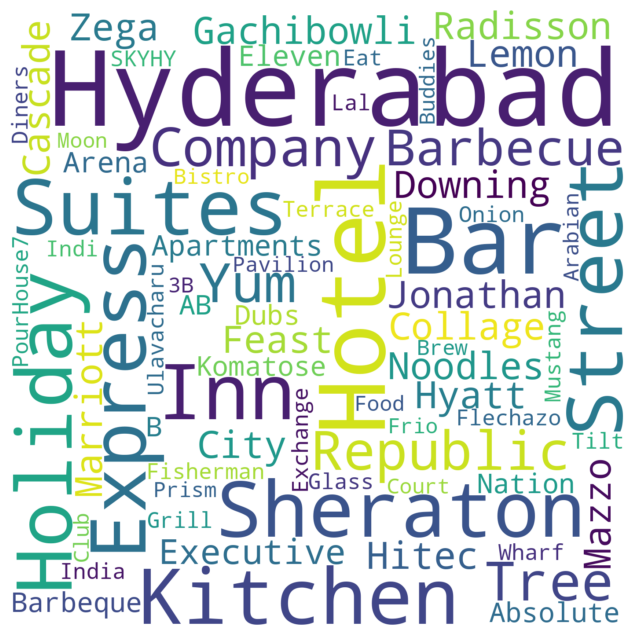

In [ ]:
# Creating the text variable
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

##Inference
##The Meta dataset has a number of expensive restaurants. The word cloud above is a fun representation of the name of such restaurants.

##4. Cuisines in Restaurants.

In [ ]:
# Using For loops to extract every single Cuisine name
cuisine_list = meta_df.Cuisines.str.split(', ')
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)
cuisine_series = pd.Series(cuisine_)

In [ ]:
# Creating DataFrame of Cuisines and their Counts
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts().reset_index()
cuisine_df.rename(columns={0: 'Count'}, inplace=True)
cuisine_df.head()

,Cuisines,Count
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Asian,15


In [ ]:
cuisine_df.shape

(44, 2)

Text(0.5, 1.0, 'Most popular cuisines at Restaurants')

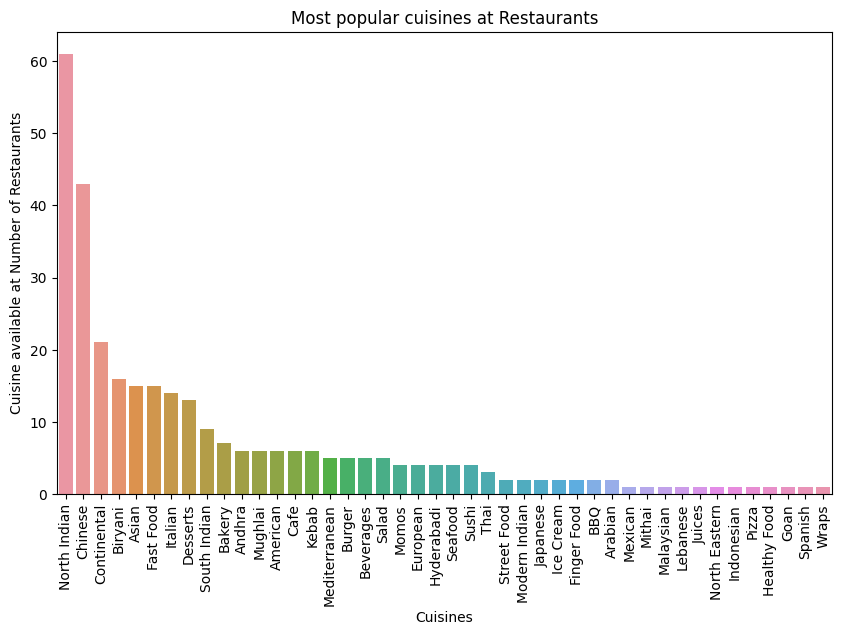

In [ ]:
# Plotting of Cuisines in Resturants
fig = plt.figure(figsize=[10,6])
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants')

##Inference
##The above bar plot shows the different cuisines that are followed by restaurants listed in the Meta dataset.
##There are about 44 cuisines in the dataset of which only the most popular cuisines are showcased in the bar graph above.
##The most famous cuisine available in restaurants is "North Indian" available in more than 60 restaurants, followed by "Chinese" and "Continental".

##5. Restaurant Collections.

In [ ]:
collections = meta_df['Collections'].value_counts().reset_index()
collections.head()

,index,Collections
0,Unknown,54
1,Food Hygiene Rated Restaurants in Hyderabad,4
2,Great Buffets,2
3,New on Gold,2
4,Hyderabad's Hottest,2


In [ ]:
collections.rename(columns={'index': 'Collection'}, inplace=True)
collections.rename(columns={'Collections': 'Count'}, inplace=True)
collections.head()

,Collection,Count
0,Unknown,54
1,Food Hygiene Rated Restaurants in Hyderabad,4
2,Great Buffets,2
3,New on Gold,2
4,Hyderabad's Hottest,2


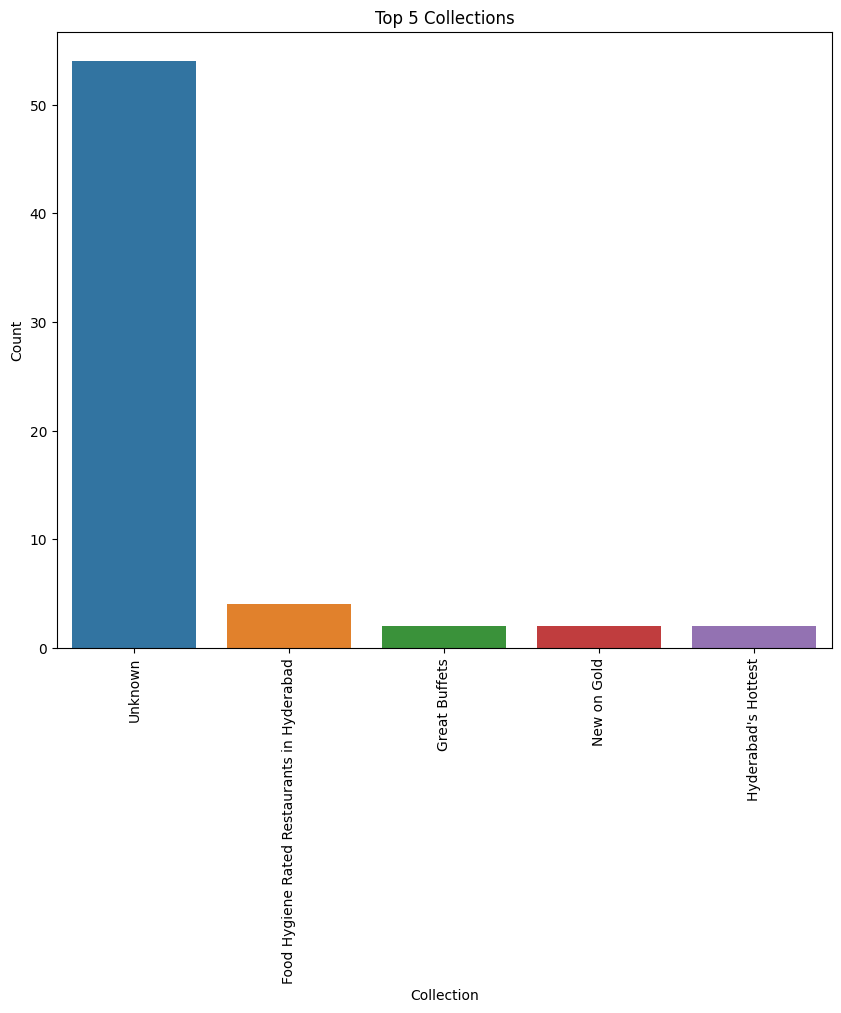

In [ ]:
# Top 5 collections
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[:5] )
plt.xticks(rotation=90)
plt.title('Top 5 Collections')
plt.show()

##Inference
##The bar graph above shows that most collections of restaurants are Unknown.
##Other than the unknown, Food Hygiene Rated Restaurants in Hyderabad is the top most Collection.

##**Clustering in Meta dataset**

In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
clustering_df= meta_df.copy()

In [ ]:
clustering_df.drop(['Links'],axis = 1 ,inplace = True)

In [ ]:
clustering_df

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...
100,IndiBlaze,600,Unknown,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,200,Unknown,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,500,Unknown,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,250,Unknown,Fast Food,8am to 12:30AM (Mon-Sun)


In [ ]:
clustering_df.Cost.value_counts()

500     13
600     10
700      8
1200     7
400      6
1000     6
200      5
800      5
1500     5
1300     4
350      3
1600     3
750      3
550      3
900      3
1100     3
1700     2
150      2
1400     2
450      2
1900     2
300      1
2500     1
850      1
650      1
1800     1
2800     1
1750     1
250      1
Name: Cost, dtype: int64

In [ ]:
clustering_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

##Merging the two dataframes i.e the Meta dataset and the Reviews dataset, so that we can add the average ratings of the restaurants.

In [ ]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review_df = reviews_df.copy()

In [ ]:
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

In [ ]:
# One review is 'Like' which is a string.It is replaced with '4'
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [ ]:
# Changing data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

In [ ]:
# Creating a new dataframe to get the average ratings of each restaurant
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [ ]:
ratings_df .sort_values(by='Rating',ascending = False).head(10)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


In [ ]:
df_cluster = clustering_df.merge(ratings_df, left_on='Name',right_on='Restaurant')
df_cluster

,Name,Cost,Collections,Cuisines,Timings,Restaurant,Rating
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,4.280
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,Paradise,4.700
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",Flechazo,4.660
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,Shah Ghouse Hotel & Restaurant,3.210
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",Over The Moon Brew Company,4.340
...,...,...,...,...,...,...,...
95,Desi Bytes,400,Unknown,"North Indian, Chinese","1 PM to 2 AM (Mon, Wed-Sun), Tue Closed",Desi Bytes,2.900
96,Hyderabadi Daawat,600,Food Hygiene Rated Restaurants in Hyderabad,"Hyderabadi, Chinese, Mughlai",12:30pm to 11:30pm (Mon-Sun),Hyderabadi Daawat,3.830
97,Zega - Sheraton Hyderabad Hotel,1750,Unknown,"Asian, Sushi",12Noon to 2AM (Mon-Sun),Zega - Sheraton Hyderabad Hotel,4.450
98,Triptify,400,Unknown,North Indian,11 AM to 11 PM,Triptify,3.550


In [ ]:
df_cluster.Rating.isnull().sum()

0

In [ ]:
df_cluster=df_cluster.loc[:,['Name','Cost','Cuisines','Rating']]
df_cluster['Cuisines'] = df_cluster['Cuisines'].apply(lambda x : x.lower())
df_cluster.head()

,Name,Cost,Cuisines,Rating
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
1,Paradise,800,"biryani, north indian, chinese",4.70
2,Flechazo,1300,"asian, mediterranean, north indian, desserts",4.66
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...",3.21
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...",4.34


##Creating a Set of Cuisines for our Clustering model

In [ ]:
# Creating a function for splitting our Cuisines and storing in list.
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
# Applying our function on Cuisine column.
df_cluster['cuisine']=df_cluster['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
# Exploding Cuisine for getting seperate cuisine for each Resturants.
df_cluster=df_cluster.explode('cuisine')
df_cluster.head()

,Name,Cost,Cuisines,Rating,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,south indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28,north indian


In [ ]:
df_cluster['cuisine']

0          chinese
0            kebab
0     south indian
0      continental
0     north indian
          ...     
97           asian
97           sushi
98    north indian
99         chinese
99         seafood
Name: cuisine, Length: 301, dtype: object

In [ ]:
df_cluster.reset_index(inplace=True)

In [ ]:
#Brinning all the cuisines into their respective sets of spicy food, Healthy food, Fast Food and Dessert.
cuisine_set=[]
for i in df_cluster['cuisine']:
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    cuisine_set.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    cuisine_set.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    cuisine_set.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    cuisine_set.append('Dessert')

In [ ]:
cuisine_sets=pd.DataFrame(cuisine_set)
cuisine_sets.columns=['cuisine']
cuisine_sets

,cuisine
0,fast food
1,spicy food
2,Healthy food
3,spicy food
4,spicy food
...,...
296,spicy food
297,fast food
298,spicy food
299,fast food


In [ ]:
cuisine_sets.value_counts()

cuisine     
spicy food      131
fast food        81
Healthy food     62
Dessert          27
dtype: int64

In [ ]:
df_cluster.drop(['cuisine'],axis=1,inplace=True)

In [ ]:
df_cluster.head()

,index,Name,Cost,Cuisines,Rating
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.28


In [ ]:
cluster_dataset=pd.concat([df_cluster,cuisine_sets],axis=1)
cluster_dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,fast food
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,spicy food
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,Healthy food
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,spicy food
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,spicy food
...,...,...,...,...,...
296,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,spicy food
297,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,fast food
298,Triptify,400,north indian,3.550,spicy food
299,Chinese Pavilion,1000,"chinese, seafood",3.745,fast food


In [ ]:
# Converting str to vectors using get-dummies.
cluster_dataset = pd.get_dummies(cluster_dataset, columns=["cuisine"],prefix=None)
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,1,0
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,0,1
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,1,0,0
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",4.280,0,0,0,1
...,...,...,...,...,...,...,...,...
296,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,0,0,0,1
297,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.450,0,0,1,0
298,Triptify,400,north indian,3.550,0,0,0,1
299,Chinese Pavilion,1000,"chinese, seafood",3.745,0,0,1,0


In [ ]:
cluster_dataset=cluster_dataset.groupby(['Name','Cost','Cuisines','Rating'])[['cuisine_Dessert','cuisine_Healthy food','cuisine_fast food','cuisine_spicy food']].sum().reset_index()

In [ ]:
cluster_dataset

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,10 Downing Street,1900,"north indian, chinese, continental",3.80,0,0,1,2
1,13 Dhaba,450,north indian,3.48,0,0,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.76,0,2,0,1
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.88,0,2,0,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.62,0,1,1,1
...,...,...,...,...,...,...,...,...
95,Urban Asia - Kitchen & Bar,1100,"asian, thai, chinese, sushi, momos",3.65,0,1,3,1
96,Yum Yum Tree - The Arabian Food Court,1200,"north indian, hyderabadi",3.56,0,0,0,2
97,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",4.45,0,0,1,1
98,Zing's Northeast Kitchen,550,"north eastern, momos",3.65,0,1,1,0


In [ ]:
# Dropping the Unnecessary columns for our model
cluster_data= cluster_dataset.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data

,Cost,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,1900,3.80,0,0,1,2
1,450,3.48,0,0,0,1
2,1100,4.76,0,2,0,1
3,1500,4.88,0,2,0,1
4,750,3.62,0,1,1,1
...,...,...,...,...,...,...
95,1100,3.65,0,1,3,1
96,1200,3.56,0,0,0,2
97,1750,4.45,0,0,1,1
98,550,3.65,0,1,1,0


In [ ]:
X=cluster_data

##Finding Optimal Number of Clusters

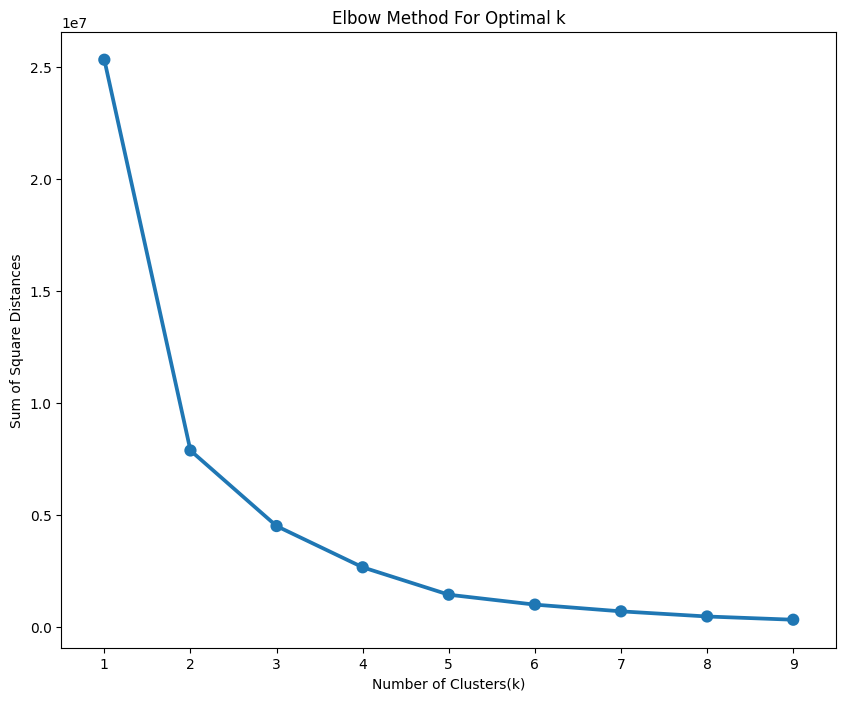

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(X)
  silhouette_avg.append(silhouette_score(X, km.labels_))

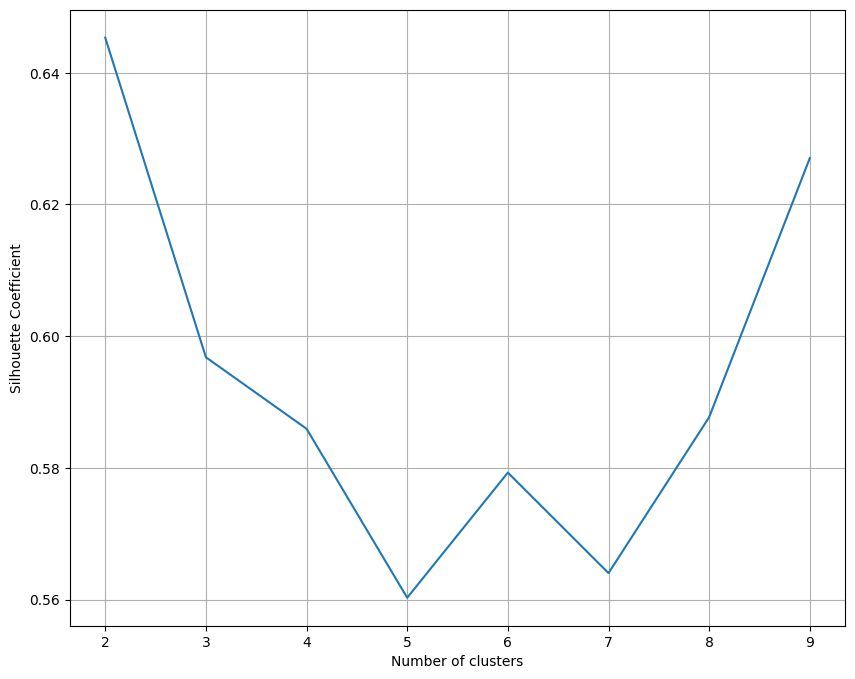

In [ ]:
# Plotting the results
plt.plot(range(2,10), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##Inference
##From the above graph we can see that the Optimal number of Clusters is 5.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(random_state=11, n_clusters=5)
model.fit(X)

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_labels = model.predict(X)

In [ ]:
cluster_dataset['labels'] = cluster_labels
cluster_dataset.head(10)

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"north indian, chinese, continental",3.800000,0,0,1,2,1
1,13 Dhaba,450,north indian,3.480000,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.760000,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.880000,0,2,0,1,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.620000,0,1,1,1,2
5,Al Saba Restaurant,750,"north indian, chinese, seafood, biryani, hyder...",3.155000,0,1,1,3,2
6,American Wild Wings,600,"american, fast food, salad, burger",3.974026,0,2,2,0,2
7,Amul,150,"ice cream, desserts",3.940000,2,0,0,0,0
8,Arena Eleven,1600,continental,4.117647,0,0,0,1,1
9,Aromas@11SIX,750,"north indian, chinese, mughlai, biryani",3.460000,0,0,1,3,2


Text(0.5, 0, 'Cost')

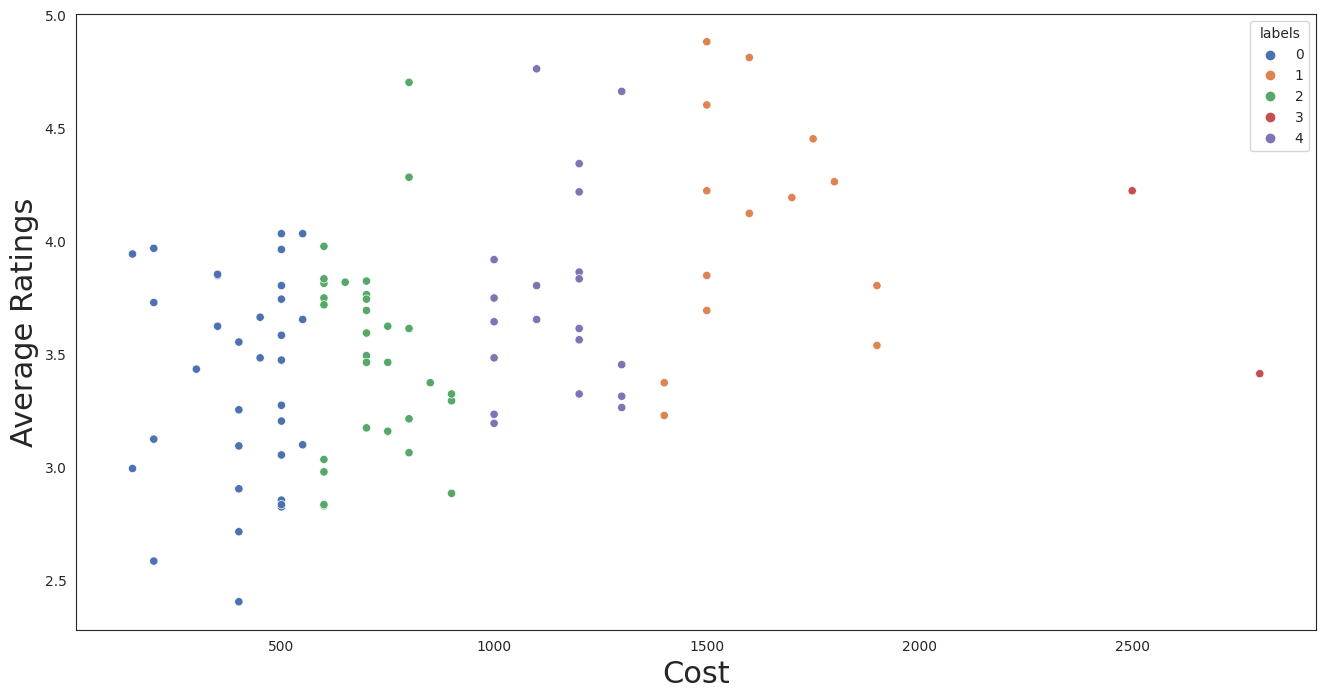

In [ ]:
plt.figure(figsize = (16,8))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

##Inference
##From the above scatter plot we see that Resturants are clustered on cost and ratings.

Text(0.5, 0, 'Cost')

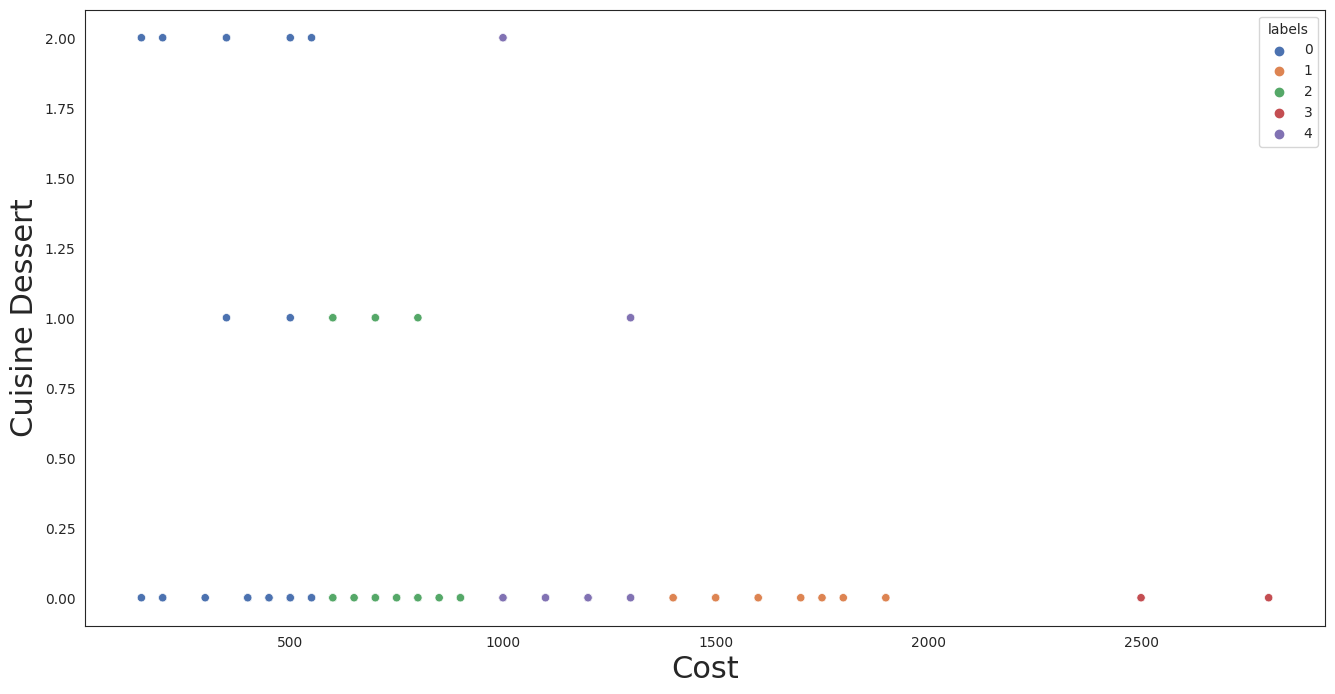

In [ ]:
plt.figure(figsize = (16,8))
sns.set_style('white')
sns.scatterplot(y='cuisine_Dessert',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Dessert',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

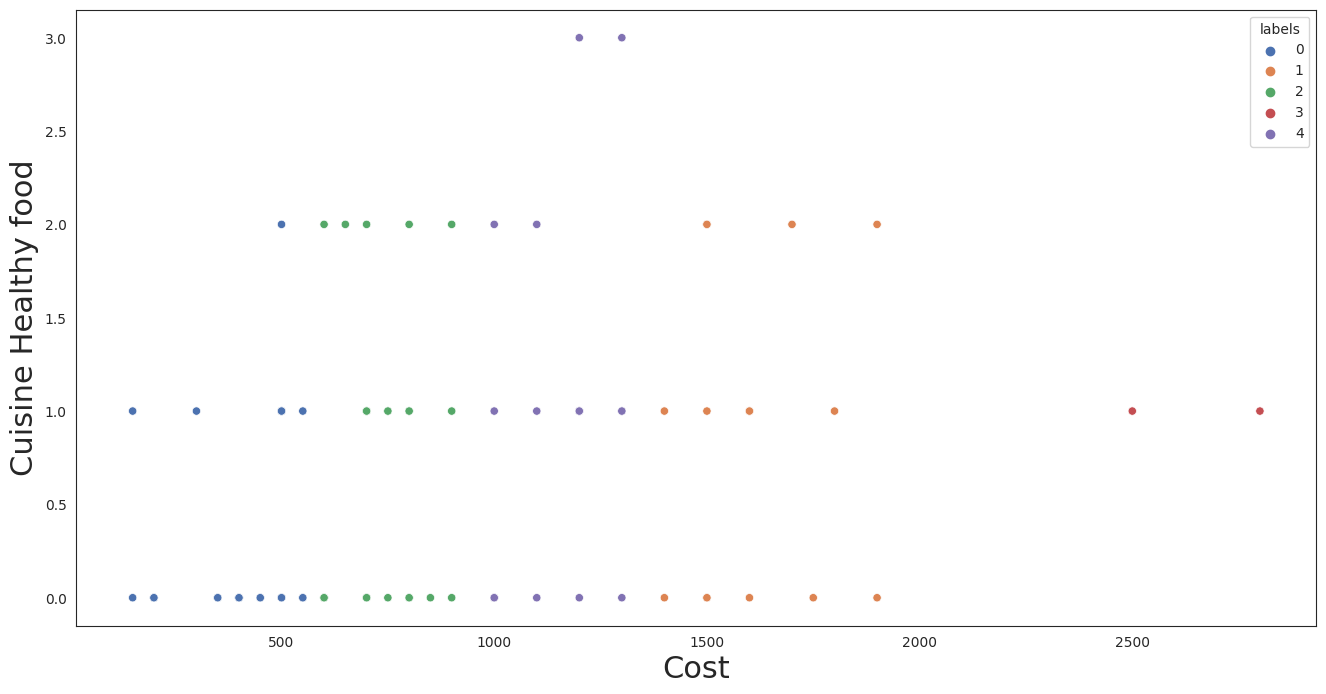

In [ ]:
plt.figure(figsize = (16,8))
sns.set_style('white')
sns.scatterplot(y='cuisine_Healthy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Healthy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

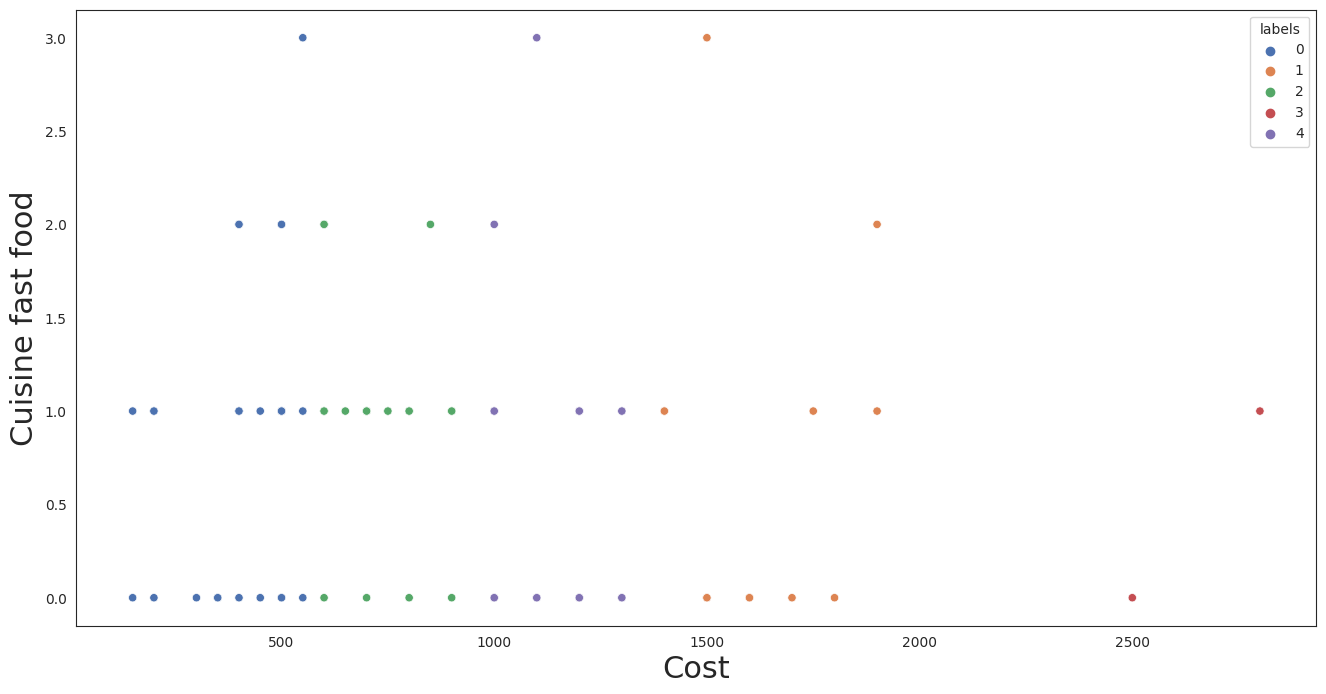

In [ ]:
plt.figure(figsize = (16,8))
sns.set_style('white')
sns.scatterplot(y='cuisine_fast food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine fast food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

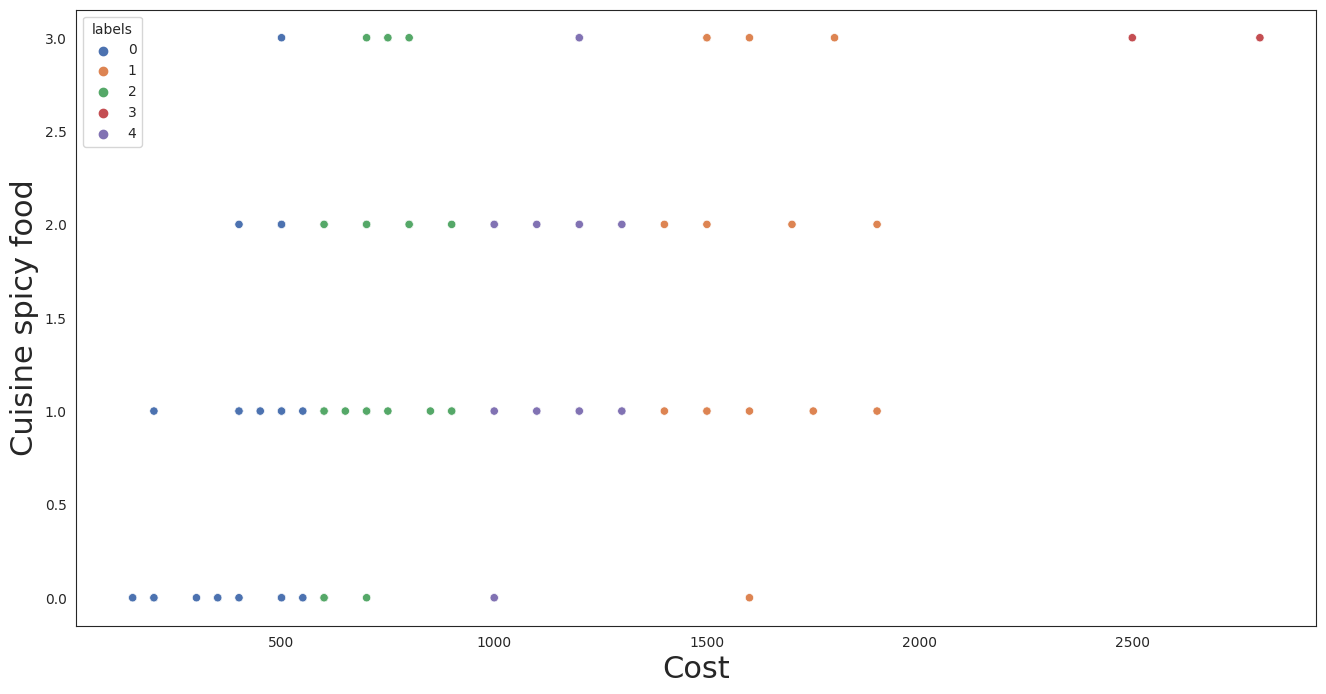

In [ ]:
plt.figure(figsize = (16,8))
sns.set_style('white')
sns.scatterplot(y='cuisine_spicy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine spicy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

##Name of Restaurants and Ratings in Different Clusters

In [ ]:
cluster_1 = cluster_dataset.loc[cluster_dataset['labels']==0]
cluster_1[['Name','Rating','labels']].head()

,Name,Rating,labels
1,13 Dhaba,3.48,0
7,Amul,3.94,0
10,Asian Meal Box,2.58,0
15,Being Hungry,3.66,0
17,Biryanis And More,3.74,0


In [ ]:
cluster_2 = cluster_dataset.loc[cluster_dataset['labels']==1]
cluster_2[['Name','Rating','labels']].head()

,Name,Rating,labels
0,10 Downing Street,3.800000,1
3,AB's - Absolute Barbecues,4.880000,1
8,Arena Eleven,4.117647,1
11,B-Dubs,4.810000,1
13,Barbeque Nation,4.120000,1


In [ ]:
cluster_3 = cluster_dataset.loc[cluster_dataset['labels']==2]
cluster_3[['Name','Rating','labels']].head()

,Name,Rating,labels
4,Absolute Sizzlers,3.620000,2
5,Al Saba Restaurant,3.155000,2
6,American Wild Wings,3.974026,2
9,Aromas@11SIX,3.460000,2
12,Banana Leaf Multicuisine Restaurant,3.690000,2


In [ ]:
cluster_4 = cluster_dataset.loc[cluster_dataset['labels']==3]
cluster_4[['Name','Rating','labels']].head()

,Name,Rating,labels
22,Collage - Hyatt Hyderabad Gachibowli,3.41,3
34,Feast - Sheraton Hyderabad Hotel,4.22,3


In [ ]:
cluster_5 = cluster_dataset.loc[cluster_dataset['labels']==4]
cluster_5[['Name','Rating','labels']].head()

,Name,Rating,labels
2,"3B's - Buddies, Bar & Barbecue",4.760,4
20,Chinese Pavilion,3.745,4
28,Diners Pavilion,3.320,4
32,Eat India Company,3.260,4
35,Flechazo,4.660,4


##Name of Cuisines in Different Clusters

In [ ]:
cluster_dataset.head()

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"north indian, chinese, continental",3.80,0,0,1,2,1
1,13 Dhaba,450,north indian,3.48,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",4.76,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",4.88,0,2,0,1,1
4,Absolute Sizzlers,750,"continental, american, chinese",3.62,0,1,1,1,2


In [ ]:
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines
cluster_dataset['Cuisines']=cluster_dataset['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
cluster_dataset.head()

,Name,Cost,Cuisines,Rating,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food,labels
0,10 Downing Street,1900,"[north indian, chinese, continental]",3.80,0,0,1,2,1
1,13 Dhaba,450,[north indian],3.48,0,0,0,1,0
2,"3B's - Buddies, Bar & Barbecue",1100,"[north indian, european, mediterranean]",4.76,0,2,0,1,4
3,AB's - Absolute Barbecues,1500,"[north indian, european, mediterranean]",4.88,0,2,0,1,1
4,Absolute Sizzlers,750,"[american, continental, chinese]",3.62,0,1,1,1,2


In [ ]:
exploded_cuisine = cluster_dataset.explode("Cuisines")

In [ ]:
for i in range (5):
  print('cluster no',i)
  print(exploded_cuisine[exploded_cuisine["labels"]==i]['Cuisines'].unique())
  print('\n')

cluster no 0
['north indian' 'desserts' 'ice cream' 'asian' 'chinese' 'biryani'
 'fast food' 'pizza' 'beverages' 'burger' 'cafe' 'american' 'bakery'
 'hyderabadi' 'andhra' 'south indian' 'arabian' 'street food' 'momos'
 'lebanese' 'kebab' 'wraps' 'north eastern' 'continental' 'healthy food']


cluster no 1
['north indian' 'chinese' 'continental' 'european' 'mediterranean'
 'american' 'bbq' 'kebab' 'asian' 'italian' 'salad' 'japanese' 'sushi'
 'south indian' 'seafood' 'goan' 'modern indian' 'andhra']


cluster no 2
['american' 'continental' 'chinese' 'seafood' 'north indian' 'hyderabadi'
 'biryani' 'salad' 'fast food' 'burger' 'mughlai' 'south indian' 'andhra'
 'kebab' 'european' 'cafe' 'bakery' 'desserts' 'asian' 'momos' 'beverages'
 'arabian' 'indonesian' 'thai' 'italian']


cluster no 3
['chinese' 'asian' 'continental' 'north indian' 'italian' 'modern indian']


cluster no 4
['north indian' 'european' 'mediterranean' 'chinese' 'seafood'
 'continental' 'italian' 'mughlai' 'beverages' 

##Inference
##From the above we co=an confirm that the Cuisines North indian, Continental and Chinese are available mostly in every Cluster.

##**Sentiment Analysis**

##**Reviews Dataset**

In [ ]:
# Reviews dataset first look
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
# Reviews dataset first look
reviews_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [ ]:
# Reviews dataset info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
# Reviews dataset ratings
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# We have one Like lets replace it with Mean Ratings
# Replacing Like with NaN
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
# Converting Rating Datatype into Float
reviews_df['Rating']= reviews_df['Rating'].astype('float64')

In [ ]:
reviews_df['Rating'].mean()

3.601044071880333

In [ ]:
reviews_df['Rating'].fillna(3.6, inplace=True)

In [ ]:
# Checking the Null values in our data
reviews_df.isnull().sum()

Restaurant     1
Reviewer      39
Review        46
Rating         0
Metadata      39
Time          39
Pictures       1
dtype: int64

In [ ]:
# Reviews dataset duplicate value count
reviews_df.duplicated().sum()

36

In [ ]:
reviews_df.drop_duplicates(inplace=True)
reviews_df.reset_index(inplace=True)

In [ ]:
# Spliting metadata column into 2 columns i.e. Reviews and followers
reviews_df['Reviews'],reviews_df['Followers']= reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers']= pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [ ]:
reviews_df.head()

,index,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [ ]:
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
# Convertting Time to DateTime format and extract year, Month, Days and hours.
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [ ]:
reviews_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,25.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,25.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,24.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,24.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,24.0,21.0


In [ ]:
reviews_df.isnull().sum()

index            0
Restaurant       1
Reviewer         3
Review          10
Rating           0
Time             3
Pictures         1
Reviews          3
Followers     1581
Year             3
Month            3
Day              3
Hour             3
dtype: int64

In [ ]:
# Replacing followers and reviews null values into 0
reviews_df['Followers'].fillna(0,inplace=True)
reviews_df['Reviews'].fillna(0,inplace=True)

In [ ]:
# Dropping the remaining missing data
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df.reset_index(inplace = True)

In [ ]:
reviews_df.isnull().sum()

level_0       0
index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

In [ ]:
# Reviews dataset shape
reviews_df.shape

(9954, 14)

##**Exploratory Data Analysis(EDA) on Reviews dataset**

##1. Top 10 Restaurants as per Ratings

In [ ]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False).reset_index()
df_rating[:15]

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.880
1,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
3,Paradise,4.700
4,Flechazo,4.660
5,The Indi Grill,4.600
6,Zega - Sheraton Hyderabad Hotel,4.450
7,Over The Moon Brew Company,4.340
8,Beyond Flavours,4.280
9,Cascade - Radisson Hyderabad Hitec City,4.260


Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

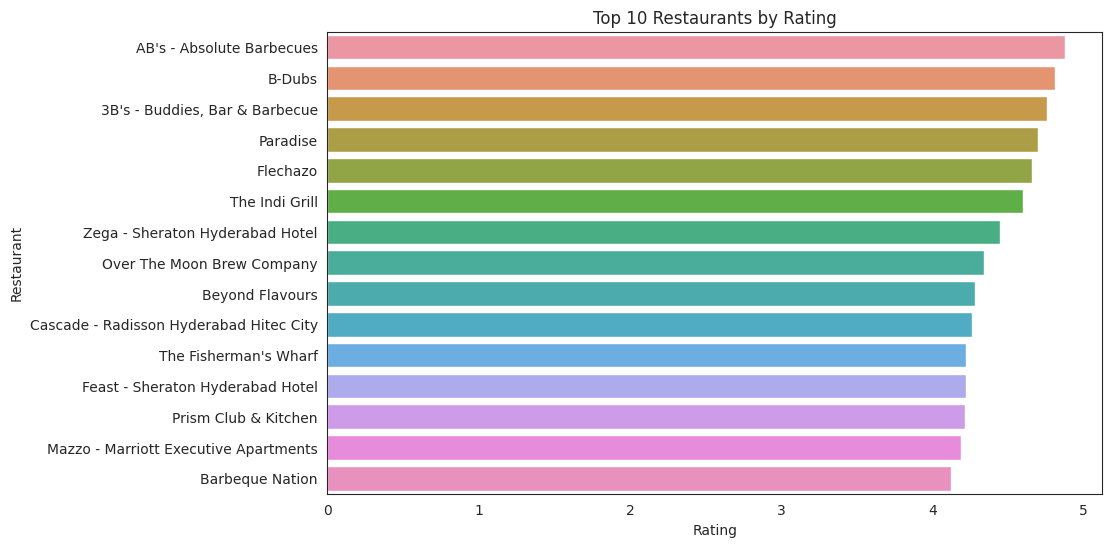

In [ ]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=df_rating[:15], x='Rating', y='Restaurant')
plt.title('Top 10 Restaurants by Rating')

##Inference
##The restaurant "AB's - Absolute Barbecues" is the top rated restaurant af the 10000 restaurants in this dataset, closely followed by B-Dubs.

##2. Top 15 Reviewers by No of Reviews

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
df_Reviewer[:15]

,Reviewer,Reviews,Followers,Rating
0,#FOODPORN,35.0,5873.0,5.0
1,#chloesviews // CAH,3.0,1.0,5.0
2,$ign,50.0,55.0,4.0
3,4mybanti,7.0,4.0,2.0
4,@FuloriBinaChutneyKaiseBani,86.0,244.0,5.0
5,@Vignesh #FoodMad,20.0,509.0,4.0
6,@foodie.amy6 | AMNA,69.0,703.0,5.0
7,A K,12.0,2654.0,5.0
8,A K RAJEEV,1.0,2.0,5.0
9,A Vinod Kumar,1.0,1.0,1.0


Text(0.5, 1.0, 'Top 15 Reviewers by No of Reviews')

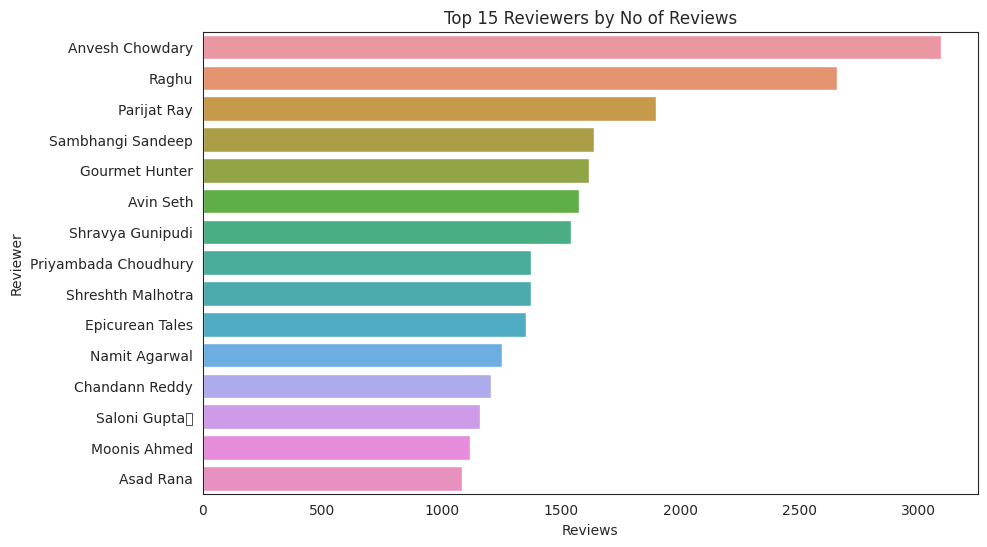

In [ ]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by No of Reviews')

##Inference
##The top-most reviewer as per the number of reviews given by them is Avnesh Chowdary who has given more than 3000 reviews,followed by Raghu who has given over 2500 reviews.

##3. Top 15 Reviewers bu No of Followers

Text(0.5, 1.0, 'Top 15 Reviewers by No of Folowers')

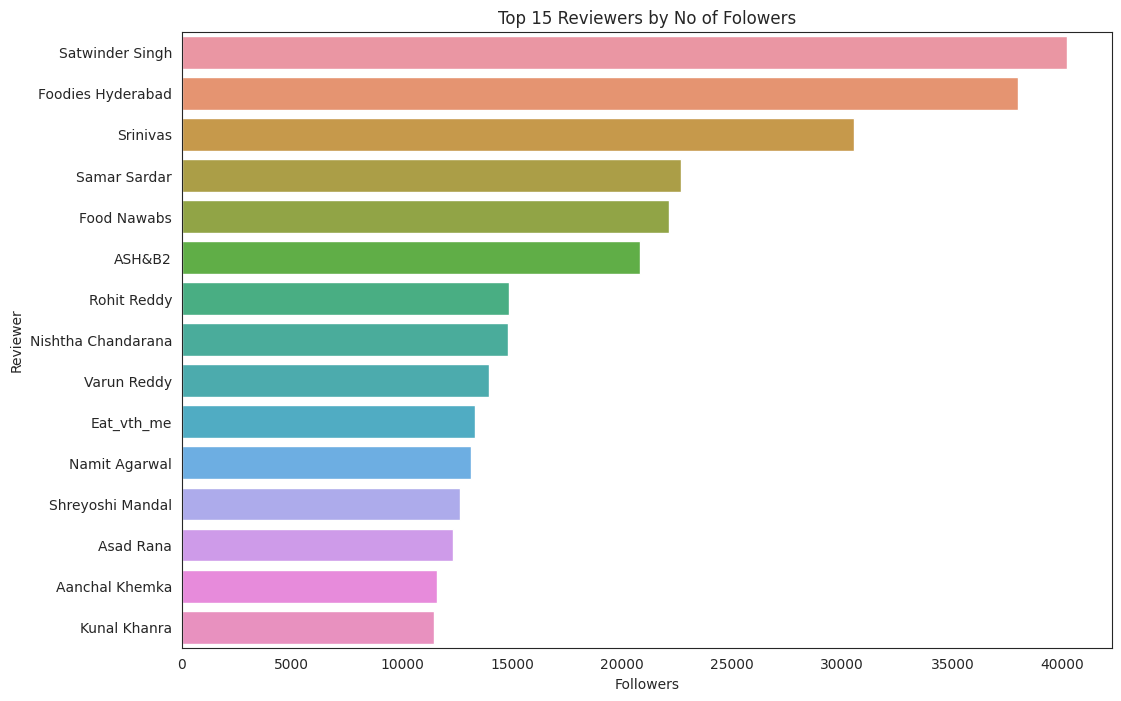

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by No of Folowers')

##Inference
##The top-most reviewer by the number of followers is Satwinder Singh who has more than 40000 followers, followed by Foodies Hyderabad with more than 35000 followers.

In [ ]:
# Import liabrary for preprocessing
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
reviews_df.head(10)

,level_0,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,25.0,15.0
1,1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,25.0,14.0
2,2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,24.0,22.0
3,3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,24.0,22.0
4,4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,24.0,21.0
5,5,5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,2019-05-24 15:22:00,0.0,1.0,0.0,2019.0,5.0,24.0,15.0
6,6,6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,2019-05-24 01:02:00,0.0,1.0,0.0,2019.0,5.0,24.0,1.0
7,7,7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,2019-05-23 15:01:00,0.0,1.0,0.0,2019.0,5.0,23.0,15.0
8,8,8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5.0,2019-05-22 23:12:00,0.0,1.0,1.0,2019.0,5.0,22.0,23.0
9,9,9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5.0,2019-05-22 22:37:00,0.0,1.0,1.0,2019.0,5.0,22.0,22.0


In [ ]:
reviews_df.Review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

##Removing Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [ ]:
# Applying the function
reviews_df['Review']= reviews_df['Review'].apply(remove_punctuation)

In [ ]:
reviews_df['Review'][0]

'The ambience was good food was quite good  had Saturday lunch  which was cost effective \nGood place for a sate brunch One can also chill with friends and or parents\nWaiter Soumen Das was really courteous and helpful'

In [ ]:
# function to remove Hashtags and Digits.
def remove_noise(tweet):
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  return tweet

In [ ]:
# Applying the function
reviews_df['Review']= reviews_df['Review'].apply(remove_noise)

##Removing stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extracting the stopwords from nltk library
sw = stopwords.words('english')
# Displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Applying the function
reviews_df['Review']= reviews_df['Review'].apply(stopwords)

In [ ]:
reviews_df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

##There is usage of Emojis in this dataset.Let's remove them.

In [ ]:
import re
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [ ]:
# Applying the function
reviews_df['Review']= reviews_df['Review'].apply(remove_emojis)

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

##Top Words before stemming


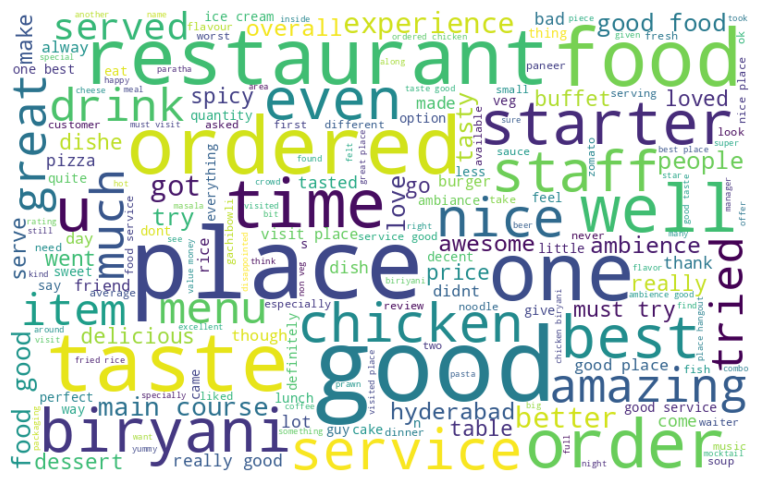

In [ ]:
# Creating text from all tweets
from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Getting the list of most used words in our data
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7007),
 ('food', 6488),
 ('place', 5663),
 ('service', 3157),
 ('chicken', 3045),
 ('taste', 2214),
 ('ordered', 2163),
 ('ambience', 2044),
 ('great', 1936),
 ('one', 1885),
 ('really', 1659),
 ('time', 1581),
 ('also', 1577),
 ('nice', 1464),
 ('like', 1450),
 ('best', 1432),
 ('biryani', 1305),
 ('staff', 1295),
 ('try', 1276),
 ('visit', 1255)]

##A function for stemming operation


In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Creating an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# Applying the function
reviews_df['Review']= reviews_df['Review'].apply(stemming)

In [ ]:
reviews_df.head()

,level_0,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,0,0,Beyond Flavours,Rusha Chakraborty,ambienc good food quit good saturday lunch cos...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,25.0,15.0
1,1,1,Beyond Flavours,Anusha Tirumalaneedi,ambienc good pleasant even servic prompt food ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,25.0,14.0
2,2,2,Beyond Flavours,Ashok Shekhawat,must tri great food great ambienc thnx servic ...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,24.0,22.0
3,3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincereti g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,24.0,22.0
4,4,4,Beyond Flavours,Dileep,food goodw order kodi drumstick basket mutton ...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,24.0,21.0


##Top words after stemming

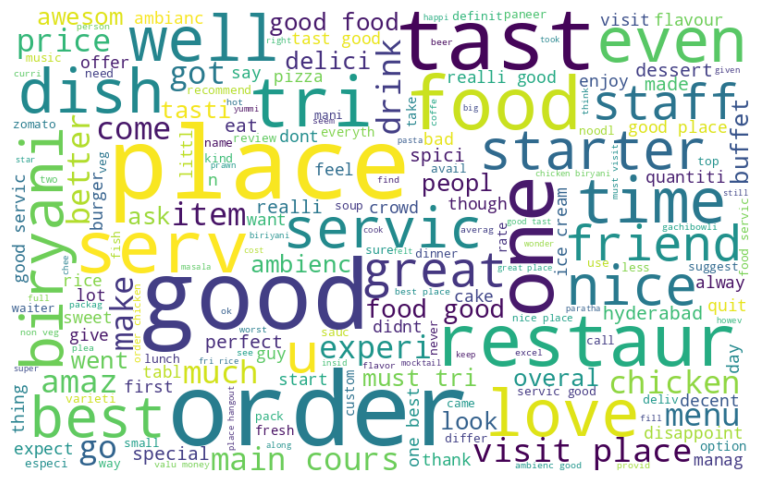

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in reviews_df['Review']])

from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7011),
 ('food', 6546),
 ('place', 6007),
 ('order', 3600),
 ('servic', 3246),
 ('chicken', 3046),
 ('tast', 2982),
 ('ambienc', 2045),
 ('time', 2040),
 ('tri', 2035),
 ('one', 1993),
 ('great', 1940),
 ('visit', 1875),
 ('like', 1815),
 ('realli', 1659),
 ('serv', 1591),
 ('also', 1577),
 ('nice', 1510),
 ('best', 1433),
 ('restaur', 1430)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

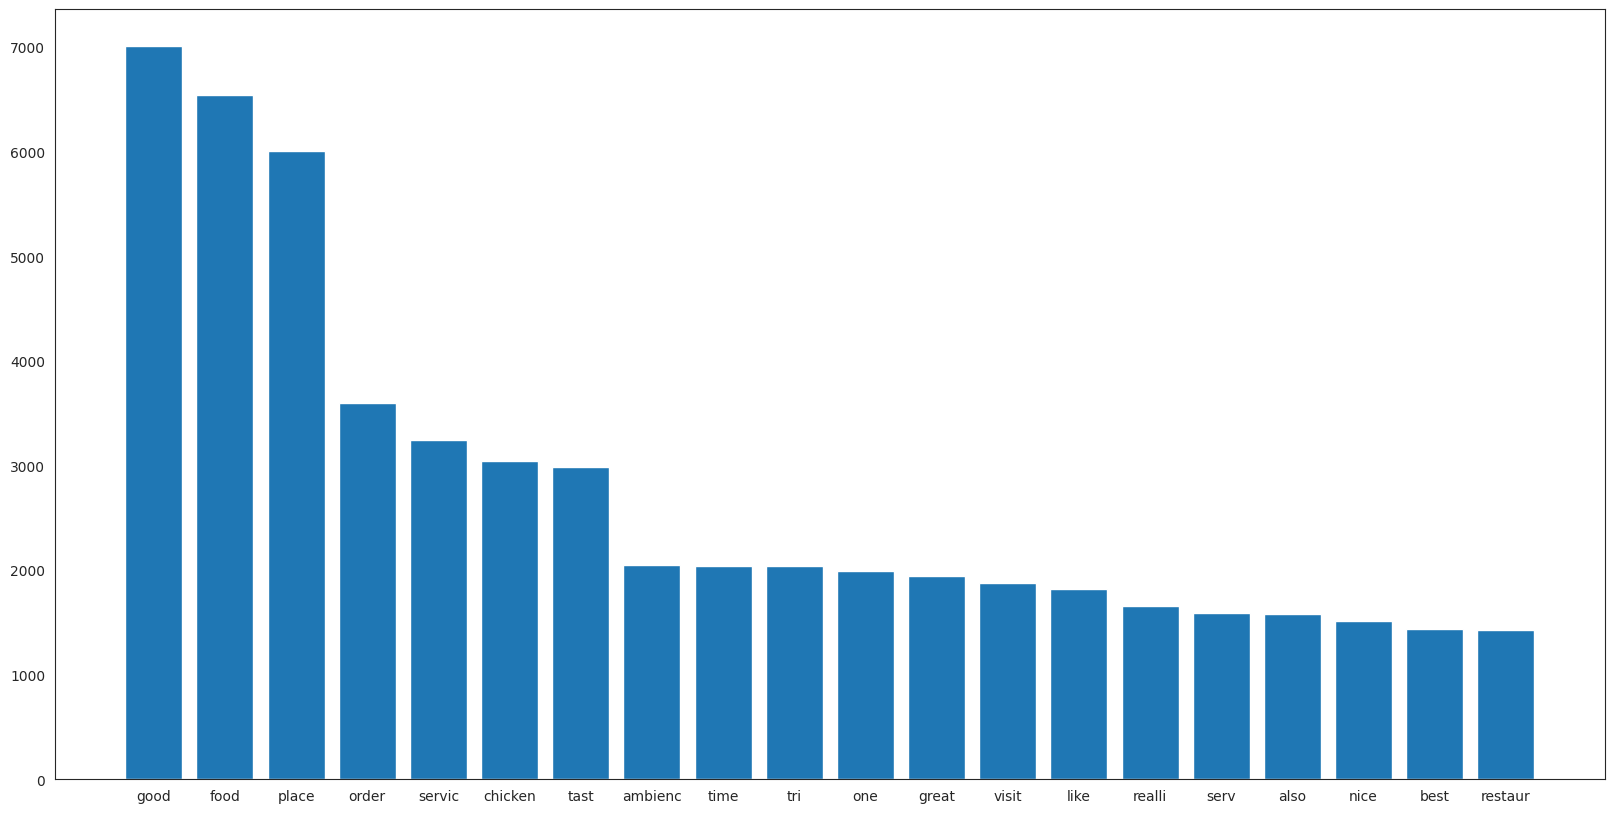

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
plt.bar(x,y)
plt.show()

##Feature Encoding


In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [ ]:
reviews_df['sentiment']=reviews_df['Rating'].apply(lambda x:sentiment(x))

In [ ]:
reviews_df['sentiment'].value_counts()

0    6315
1    3639
Name: sentiment, dtype: int64

In [ ]:
reviews_df.tail(10)

,level_0,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour,sentiment
9944,9954,9990,Chinese Pavilion,Akram Ul Haq,amaz food alway go want chines food favourit c...,5.0,2016-06-16 13:53:00,0.0,3.0,128.0,2016.0,6.0,16.0,13.0,0
9945,9955,9991,Chinese Pavilion,Krishna Teja Ratnakaram,never fan chines food visit chines pavilionban...,5.0,2016-06-15 00:50:00,0.0,9.0,54.0,2016.0,6.0,15.0,0.0,0
9946,9956,9992,Chinese Pavilion,Sujay Garg,visit restaur friend immedi blown away qualiti...,5.0,2016-06-15 00:04:00,0.0,4.0,1.0,2016.0,6.0,15.0,0.0,0
9947,9957,9993,Chinese Pavilion,Richard Rao,im go cut chase food excel must say honey chic...,5.0,2016-06-14 18:35:00,0.0,3.0,74.0,2016.0,6.0,14.0,18.0,0
9948,9958,9994,Chinese Pavilion,Shiladitya Chaudhury,chines pavilion banjara hill first chines rest...,1.5,2016-06-05 10:49:00,0.0,6.0,3.0,2016.0,6.0,5.0,10.0,1
9949,9959,9995,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well start nice courteous s...,3.0,2016-06-05 00:08:00,0.0,53.0,54.0,2016.0,6.0,5.0,0.0,1
9950,9960,9996,Chinese Pavilion,Sharad Agrawal,place never disappoint us food courteous staff...,4.5,2016-06-04 22:01:00,0.0,2.0,53.0,2016.0,6.0,4.0,22.0,0
9951,9961,9997,Chinese Pavilion,Ramandeep,bad rate main chicken bone found veg food acce...,1.5,2016-06-03 10:37:00,3.0,65.0,423.0,2016.0,6.0,3.0,10.0,1
9952,9962,9998,Chinese Pavilion,Nayana Shanbhag,person love prefer chines food coupl time husb...,4.0,2016-05-31 17:22:00,0.0,13.0,144.0,2016.0,5.0,31.0,17.0,0
9953,9963,9999,Chinese Pavilion,Bhargava Krishna,check tri delici chines food seen nonveg lunch...,3.5,2016-05-31 16:41:00,6.0,472.0,1302.0,2016.0,5.0,31.0,16.0,0


In [ ]:
sentiment_df = reviews_df[['Review','sentiment']]
sentiment_df.head()

,Review,sentiment
0,ambienc good food quit good saturday lunch cos...,0
1,ambienc good pleasant even servic prompt food ...,0
2,must tri great food great ambienc thnx servic ...,0
3,soumen das arun great guy behavior sincereti g...,0
4,food goodw order kodi drumstick basket mutton ...,0


In [ ]:
# Creating our Dependent and independent variable.
X = sentiment_df['Review']
Y = sentiment_df['sentiment']

In [ ]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(9954, 5000)

##Model Building


##Sentiment analysis superviesd


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

##Train Test Split


In [ ]:
# Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (6967, 5000)
X_test.shape :  (2987, 5000)
y_train.shape :  (6967,)
y_test.shape :  (2987,)


##Decision Tree


In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test)
dtree_recall= recall_score(dtree_predictions,y_test)

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.7241379310344828
Precision : 0.5218554861730598
Recall : 0.6701030927835051


In [ ]:
dtree_Auc_roc = roc_auc_score(dtree_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(dtree_predictions,y_test))

roc_auc_score for test set :  0.7082776580284602


In [ ]:
print('Classification Report:')
print(classification_report(dtree_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.79      2114
           1       0.52      0.67      0.59       873

    accuracy                           0.72      2987
   macro avg       0.68      0.71      0.69      2987
weighted avg       0.75      0.72      0.73      2987



##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

#Performance Metrics
logreg_accuracy = accuracy_score(logreg_predictions,y_test)
logreg_precision = precision_score(logreg_predictions,y_test)
logreg_recall= recall_score(logreg_predictions,y_test)

print('Performance of Logistic Regression')
print('Accuracy :' ,logreg_accuracy)
print('Precision :', logreg_precision)
print('Recall :', logreg_recall)

Performance of Logistic Regression
Accuracy : 0.8624037495815199
Precision : 0.7698483496877788
Recall : 0.8494094488188977


In [ ]:
logreg_Auc_roc = roc_auc_score(logreg_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(logreg_predictions,y_test))

roc_auc_score for test set :  0.8592557137549588


In [ ]:
print('Classification Report:')
print(classification_report(logreg_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1971
           1       0.77      0.85      0.81      1016

    accuracy                           0.86      2987
   macro avg       0.84      0.86      0.85      2987
weighted avg       0.87      0.86      0.86      2987



##KNN Classifier


In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.7532641446267158
Precision : 0.4977698483496878
Recall : 0.7622950819672131


In [ ]:
knn_Auc_roc = roc_auc_score(knn_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(knn_predictions,y_test))

roc_auc_score for test set :  0.7563138381011232


In [ ]:
print('Classification Report:')
print(classification_report(knn_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2255
           1       0.50      0.76      0.60       732

    accuracy                           0.75      2987
   macro avg       0.70      0.76      0.71      2987
weighted avg       0.81      0.75      0.77      2987



##Random Forest Classifier


In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier()
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test)
rcf_recall= recall_score(rcf_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.8590559089387345
Precision : 0.7082961641391614
Recall : 0.8941441441441441


In [ ]:
rcf_Auc_roc = roc_auc_score(rcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_predictions,y_test))

roc_auc_score for test set :  0.8691778367219052


In [ ]:
print('Classification Report:')
print(classification_report(rcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2099
           1       0.71      0.89      0.79       888

    accuracy                           0.86      2987
   macro avg       0.83      0.87      0.84      2987
weighted avg       0.88      0.86      0.86      2987



##XGBoost Classifier

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgbcf = XGBClassifier()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= xgbcf.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test)
xgbcf_recall= recall_score(xgbcf_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.8660863742885838
Precision : 0.7555753791257805
Recall : 0.8705035971223022


In [ ]:
xgbcf_Auc_roc = roc_auc_score(xgbcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(xgbcf_predictions,y_test))

roc_auc_score for test set :  0.8672279653933258


In [ ]:
print('Classification Report:')
print(classification_report(xgbcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      2014
           1       0.76      0.87      0.81       973

    accuracy                           0.87      2987
   macro avg       0.84      0.87      0.85      2987
weighted avg       0.87      0.87      0.87      2987



##Hyperparameter Tuning on Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['auto'],
    'max_depth' : [7,8],
     'criterion' :['gini']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf_cv= RandomForestClassifier(max_depth=8,n_estimators=300,max_features='auto',criterion='gini')
rcf_cv.fit(X_train, y_train)
rcf_cv_predictions= rcf_cv.predict(X_test)

#Performance Metrics
rcf_cv_accuracy= accuracy_score(rcf_cv_predictions,y_test)
rcf_cv_precision= precision_score(rcf_cv_predictions,y_test)
rcf_cv_recall= recall_score(rcf_cv_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_cv_accuracy)
print('Precision :',rcf_cv_precision)
print('Recall :',rcf_cv_recall)

Performance of Random Forest classifier
Accuracy : 0.6829594911282223
Precision : 0.15611061552185548
Recall : 0.9943181818181818


In [ ]:
rcf_cv_AUc_roc = roc_auc_score(rcf_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8288915704537367


In [ ]:
print('Classification Report:')
print(classification_report(rcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2811
           1       0.16      0.99      0.27       176

    accuracy                           0.68      2987
   macro avg       0.58      0.83      0.53      2987
weighted avg       0.95      0.68      0.77      2987



##Comparision of Performance of all Models


In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour',
              'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, rcf_accuracy, xgbcf_accuracy, ],
    'Precision': [dtree_precision, logreg_precision, knn_precision, rcf_precision, xgbcf_precision, ],
    'Recall': [dtree_recall, logreg_recall, knn_recall, rcf_recall, xgbcf_recall, ],
    'Auc-Roc Score': [dtree_Auc_roc, logreg_Auc_roc, knn_Auc_roc, rcf_Auc_roc ,xgbcf_Auc_roc]})

models.sort_values(by='Test accuracy', ascending=False).reset_index()

,index,Model,Test accuracy,Precision,Recall,Auc-Roc Score
0,4,XGBoost,0.866086,0.755575,0.870504,0.867228
1,1,Logistic Regression,0.862404,0.769848,0.849409,0.859256
2,3,Random Forest,0.859056,0.708296,0.894144,0.869178
3,2,K Nearest Neighbour,0.753264,0.497770,0.762295,0.756314
4,0,Decision Tree,0.724138,0.521855,0.670103,0.708278


##Inference
##From the above table we see that Logistic Regression has the  highest Test Accuracy and Precision, but Random Forest has the highest AUC-ROC score.
##From the above observations we can say that Logistic Regression and Random Forest are our best Models.



##**Conclusion**
##The project was successful in achieving the goals of clustering and sentiment analysis. The clustering part provided insights into the grouping of restaurants based on their features, which can help in decision making for users and businesses. The sentiment analysis part provided insights into the sentiments expressed by the users in their reviews, which can help businesses in improving their services and user experience.

##There are several potential areas for future work, such as implementing more advanced clustering algorithms and sentiment analysis techniques, incorporating more features such as images and menus of the restaurants, and exploring the relationships between the clustering and sentiment analysis results.

##**THANK YOU !!**